# GROUP C

# DATA ANALYSIS OF UACE RESULTS 2011-2015

In [181]:
################ CRONNIE ################

# import pandas
import pandas as pd
import warnings
from IPython.core.display import display, HTML

# Suppressing warnings (optional)
warnings.filterwarnings('ignore')

In [182]:
# Styles for tables to be used in the notebook
# custom CSS styles for tables
table_styles = """
<style>
    /* Change background color of header row */
    th {
        background-color: #2c3e50;
    }
    /* Change background color of even rows */
    tr:nth-child(even) {
        background-color: #34495e;
    }
    /* Change background color of odd rows */
    tr:nth-child(odd) {
        background-color: #2c3e50;
    }
    /* Change text color of all cells */
    td {
        color: white;
    }
</style>
"""

# Apply the custom CSS styles to the table
display(HTML(table_styles))

## Data Cleaning


In [183]:
# read csv file
results_df = pd.read_csv("./UaceResults2011-2015.csv")

results_df.head(5)

,District_Name,SCHOOL,Gender,2011 Total,%0-5 Points,%6-10 Points,%11-15 Points,%16-20 Points,%21-25 Points,2012 Total,...,2014 Total,%0-5 Points.3,%6-10 Points.3,%11-15 Points.3,%16-20 Points.3,2015 Total,%0-5 Points.4,%6-10 Points.4,%11-15 Points.4,%16-20 Points.4
0,AMUDAT,POKOT SECONDARY SCHOOL,FEMALE,NaN,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,50.0,0.0,50.0,0.0,1,0.0,0.0,100.0,0.0
1,AMUDAT,NaN,MALE,NaN,0.0,0.0,0.0,0.0,0.0,8.0,...,9.0,55.6,44.4,0.0,0.0,4,25.0,50.0,25.0,0.0
2,AMUDAT Total,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,11.0,...,11.0,54.5,36.4,9.1,0.0,,20.0,40.0,40.0,0.0
3,PADER,ARCHBP.FLYNN SECONDARY SCHOOL,FEMALE,NaN,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,0.0,0.0,0.0,0.0,14,21.4,42.9,35.7,0.0
4,PADER,NaN,MALE,NaN,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,0.0,0.0,0.0,0.0,22,40.9,50.0,9.1,0.0


In [184]:
# discover null rows
print(results_df.isnull().sum())

District_Name         0
SCHOOL             1959
Gender              114
2011 Total         1240
%0-5 Points           0
%6-10 Points          0
%11-15 Points         0
%16-20 Points         0
%21-25 Points         0
2012 Total          985
%0-5 Points.1         0
%6-10 Points.1        0
%11-15 Points.1       0
%16-20 Points.1       0
%21-25 Points.1       0
2013 Total          553
%0-5 Points.2         0
%6-10 Points.2        0
%11-15 Points.2       0
%16-20 Points.2       0
2014 Total          358
%0-5 Points.3         0
%6-10 Points.3        0
%11-15 Points.3       0
%16-20 Points.3       0
2015 Total          295
%0-5 Points.4         0
%6-10 Points.4        0
%11-15 Points.4       0
%16-20 Points.4       0
dtype: int64


In [185]:
# Change school totals for schools with no students in a particular year to zeros
zero_school_total_columns = ['2011 Total', '2012 Total', '2013 Total', '2014 Total', '2015 Total']

results_df[zero_school_total_columns] =results_df[zero_school_total_columns].fillna(0.0)


In [186]:
# discover current null rows
print(results_df.isnull().sum())

District_Name         0
SCHOOL             1959
Gender              114
2011 Total            0
%0-5 Points           0
%6-10 Points          0
%11-15 Points         0
%16-20 Points         0
%21-25 Points         0
2012 Total            0
%0-5 Points.1         0
%6-10 Points.1        0
%11-15 Points.1       0
%16-20 Points.1       0
%21-25 Points.1       0
2013 Total            0
%0-5 Points.2         0
%6-10 Points.2        0
%11-15 Points.2       0
%16-20 Points.2       0
2014 Total            0
%0-5 Points.3         0
%6-10 Points.3        0
%11-15 Points.3       0
%16-20 Points.3       0
2015 Total            0
%0-5 Points.4         0
%6-10 Points.4        0
%11-15 Points.4       0
%16-20 Points.4       0
dtype: int64


In [187]:
######################## OJOK ###########################

# Handle misplaced schools
'''
Algorithm: If cell in 'SCHOOL' column is empty AND the entry is not for DISTRICT TOTAL ie cell for DISTRICT doesn't contain 'Total'
            THEN copy the SCHOOL before and paste it in the current SCHOOL cell.
'''
# Loop through the DataFrame and fill empty cells in the 'SCHOOL' column
previous_school = None

for index, row in results_df.iterrows():
    if pd.isnull(row['SCHOOL']):
        district_name = row['District_Name']
        # We make sure the previous school in the entry before isn't null so that we don't copy null values if present.
        if previous_school is not None and 'total' not in district_name.lower():
            results_df.at[index, 'SCHOOL'] = previous_school
    else:
        previous_school = row['SCHOOL']


In [188]:
# discover current null rows
print(results_df.isnull().sum())

District_Name        0
SCHOOL             112
Gender             114
2011 Total           0
%0-5 Points          0
%6-10 Points         0
%11-15 Points        0
%16-20 Points        0
%21-25 Points        0
2012 Total           0
%0-5 Points.1        0
%6-10 Points.1       0
%11-15 Points.1      0
%16-20 Points.1      0
%21-25 Points.1      0
2013 Total           0
%0-5 Points.2        0
%6-10 Points.2       0
%11-15 Points.2      0
%16-20 Points.2      0
2014 Total           0
%0-5 Points.3        0
%6-10 Points.3       0
%11-15 Points.3      0
%16-20 Points.3      0
2015 Total           0
%0-5 Points.4        0
%6-10 Points.4       0
%11-15 Points.4      0
%16-20 Points.4      0
dtype: int64


In [189]:
# Remove genderless entries that are not district totals

# Filter and remove entries where 'Gender' column is empty and 'District_Name' doesn't contain 'Total'
results_df = results_df[~(results_df['Gender'].isnull() & ~results_df['District_Name'].str.contains('Total', case=False))]


In [190]:
# discover current null rows
print(results_df.isnull().sum())

District_Name        0
SCHOOL             112
Gender             112
2011 Total           0
%0-5 Points          0
%6-10 Points         0
%11-15 Points        0
%16-20 Points        0
%21-25 Points        0
2012 Total           0
%0-5 Points.1        0
%6-10 Points.1       0
%11-15 Points.1      0
%16-20 Points.1      0
%21-25 Points.1      0
2013 Total           0
%0-5 Points.2        0
%6-10 Points.2       0
%11-15 Points.2      0
%16-20 Points.2      0
2014 Total           0
%0-5 Points.3        0
%6-10 Points.3       0
%11-15 Points.3      0
%16-20 Points.3      0
2015 Total           0
%0-5 Points.4        0
%6-10 Points.4       0
%11-15 Points.4      0
%16-20 Points.4      0
dtype: int64


In [191]:
# Remove duplicates
results_df = results_df.drop_duplicates()

In [192]:
# Convert data in relevant columns from string to float
# Select all columns from the 4th column onwards
columns_to_convert = results_df.columns[3:]

# Convert space ie ' ' strings to 0.0f in the selected columns. To prevent ValueErros during conversions
results_df[columns_to_convert] = results_df[columns_to_convert].replace(' ', float(0.0))

# Convert data from the 4th column onwards to float
results_df[columns_to_convert] = results_df[columns_to_convert].astype(float)


In [193]:
# At this point we keep two dataframes for consistent accuracy. One dataset will keep the district totals
# and will be used for operations involving districts, while the other removes district totals by removing genderless entries

# Dataset for district operations
districts_df = results_df

# Dataset without district totals
results_df = results_df[(results_df['Gender'] == 'MALE') | (results_df['Gender'] == 'FEMALE')]

## Descriptive Data Analysis


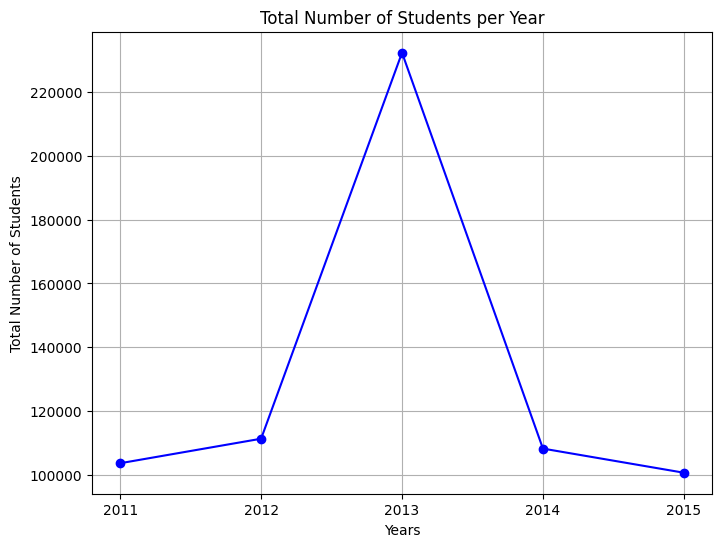

In [194]:
######################## ARIYO ###########################

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

years = [2011, 2012, 2013, 2014, 2015]
grandTotalEntry = districts_df.iloc[-1]
# Extract the required data from the last entry
# using the last entry since it has the grand total of each year
total_students = [
    grandTotalEntry['2011 Total'],
    grandTotalEntry['2012 Total'],
    grandTotalEntry['2013 Total'],
    grandTotalEntry['2014 Total'],
    grandTotalEntry['2015 Total']
]

# Create a plot using Matplotlib
plt.figure(figsize=(8, 6)).gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(years, total_students, marker='o', linestyle='-', color='b')
plt.xlabel('Years')
plt.ylabel('Total Number of Students')
plt.title('Total Number of Students per Year')
plt.grid(True)
plt.show()

### General Perfomance of students


In [195]:
# Plot of percentage of students above average in each year
print(grandTotalEntry)

District_Name      Grand Total
SCHOOL                     NaN
Gender                     NaN
2011 Total            103681.0
%0-5 Points               22.5
%6-10 Points              34.9
%11-15 Points             25.7
%16-20 Points             13.6
%21-25 Points              3.3
2012 Total            111358.0
%0-5 Points.1             20.8
%6-10 Points.1            36.3
%11-15 Points.1           27.1
%16-20 Points.1           12.7
%21-25 Points.1            3.1
2013 Total            232258.0
%0-5 Points.2             37.2
%6-10 Points.2            37.3
%11-15 Points.2           20.4
%16-20 Points.2            5.1
2014 Total            108263.0
%0-5 Points.3             30.8
%6-10 Points.3            36.4
%11-15 Points.3           24.5
%16-20 Points.3            8.4
2015 Total            100705.0
%0-5 Points.4             30.1
%6-10 Points.4            43.0
%11-15 Points.4           20.0
%16-20 Points.4            3.1
Name: 3915, dtype: object


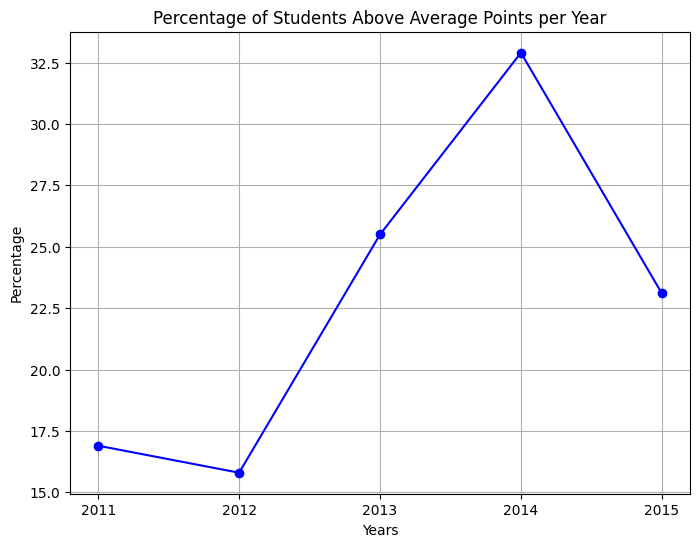

In [196]:
# From the observation above, we see that duplicate columns ie %0-5 Points, %6-10 Points, %11-15 Points, %16-20 Points, %21-25 Points
# Have been appended with .1, .2, .3, .4 for the years after '2011 Total' which are 2012, 2013, 2014, 2015 respectively
# Note also that after 2012, the points moved from 25 to 20

aboveAverage_2011 = grandTotalEntry['%16-20 Points'] + grandTotalEntry['%21-25 Points']
aboveAverage_2012 = grandTotalEntry['%16-20 Points.1'] + grandTotalEntry['%21-25 Points.1']
aboveAverage_2013 = grandTotalEntry['%11-15 Points.2'] + grandTotalEntry['%16-20 Points.2']
aboveAverage_2014 = grandTotalEntry['%11-15 Points.3'] + grandTotalEntry['%16-20 Points.3']
aboveAverage_2015 = grandTotalEntry['%11-15 Points.4'] + grandTotalEntry['%16-20 Points.4']

aboveAveragePerYear = [aboveAverage_2011, aboveAverage_2012, aboveAverage_2013, aboveAverage_2014, aboveAverage_2015]

# Create a plot of Percentage of students above average per year
plt.figure(figsize=(8, 6)).gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(years, aboveAveragePerYear, marker='o', linestyle='-', color='b')
plt.xlabel('Years')
plt.ylabel('Percentage')
plt.title('Percentage of Students Above Average Points per Year')
plt.grid(True)
plt.show()

In [197]:
######################## CONRAD ###########################
from matplotlib.ticker import MaxNLocator


# Step 1: Filter the DataFrame to include only entries with 'Gender' as 'FEMALE' then 'MALE'
female_data = results_df[results_df['Gender'] == 'FEMALE']
male_data = results_df[results_df['Gender'] == 'MALE']

# Step 2: Calculate the total of all values from the 4th column onwards for 'FEMALE' entries
female_total = female_data.iloc[:, 3:].sum()
male_total = male_data.iloc[:, 3:].sum()


### Males Vs Females Numbers


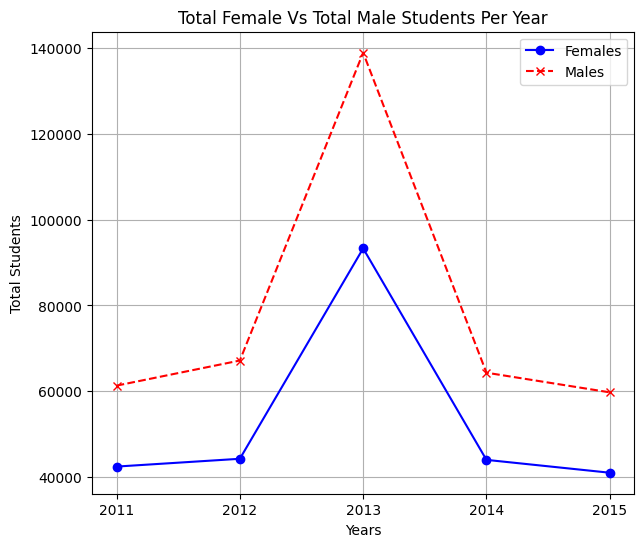

In [198]:
total_males_per_year = [
    male_total['2011 Total'],
    male_total['2012 Total'],
    male_total['2013 Total'],
    male_total['2014 Total'],
    male_total['2015 Total']
]

total_females_per_year = [
    female_total['2011 Total'],
    female_total['2012 Total'],
    female_total['2013 Total'],
    female_total['2014 Total'],
    female_total['2015 Total']
]

# Create a new figure and axis object
plt.figure(figsize=(7, 6))
ax = plt.gca()

# Plot the first graph
ax.plot(years, total_females_per_year, label='Females', marker='o', linestyle='-', color='b')

# Plot the second graph
ax.plot(years, total_males_per_year, label='Males', marker='x', linestyle='--', color='r')

#to remove the years in points ie 2011.5 from the x-axis
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Customize the plot
plt.xlabel('Years')
plt.ylabel('Total Students')
plt.title('Total Female Vs Total Male Students Per Year')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [199]:
# Females above average per year
femalesAboveAverage_2011 = 0
femalesAboveAverage_2012 = 0
femalesAboveAverage_2013 = 0
femalesAboveAverage_2014 = 0
femalesAboveAverage_2015 = 0

for index, row in female_data.iterrows():
    femalesAboveAverage_2011 += ((row['%16-20 Points'] + row['%21-25 Points']) / 100) * row['2011 Total']
    femalesAboveAverage_2012 += ((row['%16-20 Points.1'] + row['%21-25 Points.1']) / 100) * row['2012 Total']
    femalesAboveAverage_2013 += ((row['%11-15 Points.2'] + row['%16-20 Points.2']) / 100) * row['2013 Total']
    femalesAboveAverage_2014 += ((row['%11-15 Points.3'] + row['%16-20 Points.3']) / 100) * row['2014 Total']
    femalesAboveAverage_2015 += ((row['%11-15 Points.4'] + row['%16-20 Points.4']) / 100) * row['2015 Total']

# Males above average per year
malesAboveAverage_2011 = 0
malesAboveAverage_2012 = 0
malesAboveAverage_2013 = 0
malesAboveAverage_2014 = 0
malesAboveAverage_2015 = 0

for index, row in male_data.iterrows():
    malesAboveAverage_2011 += ((row['%16-20 Points'] + row['%21-25 Points']) / 100) * row['2011 Total']
    malesAboveAverage_2012 += ((row['%16-20 Points.1'] + row['%21-25 Points.1']) / 100) * row['2012 Total']
    malesAboveAverage_2013 += ((row['%11-15 Points.2'] + row['%16-20 Points.2']) / 100) * row['2013 Total']
    malesAboveAverage_2014 += ((row['%11-15 Points.3'] + row['%16-20 Points.3']) / 100) * row['2014 Total']
    malesAboveAverage_2015 += ((row['%11-15 Points.4'] + row['%16-20 Points.4']) / 100) * row['2015 Total']

femalesAboveAveragePerYear = [
    femalesAboveAverage_2011, 
    femalesAboveAverage_2012, 
    femalesAboveAverage_2013, 
    femalesAboveAverage_2014, 
    femalesAboveAverage_2015
]

malesAboveAveragePerYear = [
    malesAboveAverage_2011, 
    malesAboveAverage_2012, 
    malesAboveAverage_2013, 
    malesAboveAverage_2014, 
    malesAboveAverage_2015
]

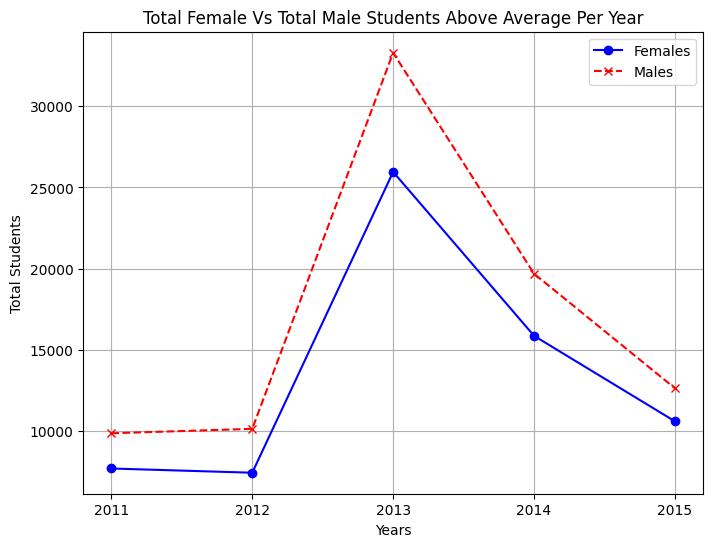

In [200]:
#Create a new figure and axis object
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Plot the first graph
ax.plot(years, femalesAboveAveragePerYear, label='Females', marker='o', linestyle='-', color='b')

# Plot the second graph
ax.plot(years, malesAboveAveragePerYear, label='Males', marker='x', linestyle='--', color='r')

#to remove the years in points ie 2011.5 from the x-axis
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Customize the plot
plt.xlabel('Years')
plt.ylabel('Total Students')
plt.title('Total Female Vs Total Male Students Above Average Per Year')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## Districts Analysis


In [201]:
# Import necessary packages for map rendering
import geocoder             # geocoder to get coordinates for each school
import folium               # to display the map, and add markers for each location
import seaborn as sns                  # to render heat maps

In [202]:
# Filter the districts dataframe to remain with only ditrict totals excluding the Grand Total
district_totals = districts_df[districts_df['District_Name'].str.contains('Total') & ~districts_df['District_Name'].str.contains('Grand Total')]

# Remove 'Total' from ditrict names since we are clearly working with totals here and would like to see only district names 
# with their totals 
district_totals['District_Name'] = district_totals['District_Name'].str.replace('Total', '')

sortedDistricts_2011 = district_totals.sort_values(by='2011 Total', ascending=False)
sortedDistricts_2012 = district_totals.sort_values(by='2012 Total', ascending=False)
sortedDistricts_2013 = district_totals.sort_values(by='2013 Total', ascending=False)
sortedDistricts_2014 = district_totals.sort_values(by='2014 Total', ascending=False)
sortedDistricts_2015 = district_totals.sort_values(by='2015 Total', ascending=False)

print("Table showing the top 10 districts with the highest number of students in 2011")
display(sortedDistricts_2011[['District_Name', '2011 Total']].head(10))

print("Table showing the top 10 districts with the highest number of students in 2012")
display(sortedDistricts_2012[['District_Name', '2012 Total']].head(10))

print("Table showing the top 10 districts with the highest number of students in 2013")
display(sortedDistricts_2013[['District_Name', '2013 Total']].head(10))

print("Table showing the top 10 districts with the highest number of students in 2014")
display(sortedDistricts_2014[['District_Name', '2014 Total']].head(10))

print("Table showing the top 10 districts with the highest number of students in 2015")
display(sortedDistricts_2015[['District_Name', '2015 Total']].head(10))


Table showing the top 10 districts with the highest number of students in 2011


,District_Name,2011 Total
888,WAKISO,17895.0
2075,KAMPALA,17150.0
3188,MUKONO,6287.0
1629,MBALE,3516.0
300,JINJA,3329.0
3374,LUWERO,2884.0
2886,MBARARA,2498.0
2209,KABALE,2296.0
2445,BUSHENYI MAIN,2232.0
2729,MASAKA MAIN,2195.0


Table showing the top 10 districts with the highest number of students in 2012


,District_Name,2012 Total
888,WAKISO,19024.0
2075,KAMPALA,17291.0
3188,MUKONO,6679.0
1629,MBALE,3849.0
300,JINJA,3765.0
3374,LUWERO,2916.0
2886,MBARARA,2776.0
2445,BUSHENYI MAIN,2502.0
2209,KABALE,2485.0
213,BUIKWE,2340.0


Table showing the top 10 districts with the highest number of students in 2013


,District_Name,2013 Total
888,WAKISO,38588.0
2075,KAMPALA,32602.0
3188,MUKONO,13430.0
1629,MBALE,7530.0
300,JINJA,7492.0
3374,LUWERO,5968.0
2886,MBARARA,5770.0
2209,KABALE,5370.0
2445,BUSHENYI MAIN,5094.0
213,BUIKWE,5086.0


Table showing the top 10 districts with the highest number of students in 2014


,District_Name,2014 Total
888,WAKISO,18975.0
2075,KAMPALA,15306.0
3188,MUKONO,6635.0
300,JINJA,3604.0
1629,MBALE,3455.0
2886,MBARARA,2894.0
3374,LUWERO,2772.0
2445,BUSHENYI MAIN,2571.0
2209,KABALE,2384.0
213,BUIKWE,2380.0


Table showing the top 10 districts with the highest number of students in 2015


,District_Name,2015 Total
888,WAKISO,18552.0
2075,KAMPALA,14135.0
3188,MUKONO,6542.0
300,JINJA,3019.0
1629,MBALE,2998.0
2886,MBARARA,2768.0
3374,LUWERO,2573.0
2445,BUSHENYI MAIN,2395.0
2209,KABALE,2311.0
213,BUIKWE,2264.0


In [203]:
######################## SAYNO ###########################

sortedDistricts_2011 = district_totals.sort_values(by='2011 Total', ascending=True)
sortedDistricts_2012 = district_totals.sort_values(by='2012 Total', ascending=True)
sortedDistricts_2013 = district_totals.sort_values(by='2013 Total', ascending=True)
sortedDistricts_2014 = district_totals.sort_values(by='2014 Total', ascending=True)
sortedDistricts_2015 = district_totals.sort_values(by='2015 Total', ascending=True)

print("Table showing the top 10 districts with the least number of students in 2011")
display(sortedDistricts_2011[['District_Name', '2011 Total']].head(10))

print("Table showing the top 10 districts with the least number of students in 2012")
display(sortedDistricts_2012[['District_Name', '2012 Total']].head(10))

print("Table showing the top 10 districts with the least number of students in 2013")
display(sortedDistricts_2013[['District_Name', '2013 Total']].head(10))

print("Table showing the top 10 districts with the least number of students in 2014")
display(sortedDistricts_2014[['District_Name', '2014 Total']].head(10))

print("Table showing the top 10 districts with the least number of students in 2015")
display(sortedDistricts_2015[['District_Name', '2015 Total']].head(10))

Table showing the top 10 districts with the least number of students in 2011


,District_Name,2011 Total
2,AMUDAT,0.0
2619,BULAMBULI,0.0
952,KITGUM,0.0
3479,ALEBTONG,0.0
3520,NAKAPIRIPIRIT,0.0
1056,NAPAK,13.0
1043,AMURU,13.0
957,NTOROKO,14.0
9,PADER,20.0
1103,ZOMBO,27.0


Table showing the top 10 districts with the least number of students in 2012


,District_Name,2012 Total
2619,BULAMBULI,0.0
3479,ALEBTONG,0.0
3520,NAKAPIRIPIRIT,0.0
952,KITGUM,10.0
2,AMUDAT,11.0
957,NTOROKO,14.0
1056,NAPAK,17.0
9,PADER,50.0
1103,ZOMBO,56.0
1043,AMURU,60.0


Table showing the top 10 districts with the least number of students in 2013


,District_Name,2013 Total
3520,NAKAPIRIPIRIT,0.0
2,AMUDAT,22.0
1056,NAPAK,32.0
957,NTOROKO,44.0
952,KITGUM,80.0
2464,KALANGALA,106.0
3479,ALEBTONG,114.0
1678,KATAKWI,114.0
9,PADER,116.0
1043,AMURU,128.0


Table showing the top 10 districts with the least number of students in 2014


,District_Name,2014 Total
3520,NAKAPIRIPIRIT,10.0
2,AMUDAT,11.0
1056,NAPAK,13.0
952,KITGUM,23.0
957,NTOROKO,30.0
3479,ALEBTONG,38.0
2464,KALANGALA,39.0
3275,KOTIDO MAIN,49.0
9,PADER,53.0
1043,AMURU,57.0


Table showing the top 10 districts with the least number of students in 2015


,District_Name,2015 Total
2,AMUDAT,0.0
3520,NAKAPIRIPIRIT,10.0
1056,NAPAK,21.0
957,NTOROKO,25.0
952,KITGUM,38.0
1678,KATAKWI,41.0
3765,AMOLATAR,44.0
966,ABIM,44.0
3479,ALEBTONG,44.0
3678,KAABONG,48.0


In [204]:
# We now get the distrcits with the best performance (above average) per year

# Create a new temporary column representing the sum of two columns ie %16-20 points and %20-25 points for 2011, 2012 while
# %11-15 points and %16-20 points for the other years

district_totals['Above Average 2011'] = district_totals['%16-20 Points'] + district_totals['%21-25 Points']
district_totals['Above Average 2012'] = district_totals['%16-20 Points.1'] + district_totals['%21-25 Points.1']
district_totals['Above Average 2013'] = district_totals['%11-15 Points.2'] + district_totals['%16-20 Points.2']
district_totals['Above Average 2014'] = district_totals['%11-15 Points.3'] + district_totals['%16-20 Points.3']
district_totals['Above Average 2015'] = district_totals['%11-15 Points.4'] + district_totals['%16-20 Points.4']

# Sort the DataFrame based on the combined column
sortedDistricts_2011 = district_totals.sort_values(by='Above Average 2011', ascending=False)
sortedDistricts_2012 = district_totals.sort_values(by='Above Average 2012', ascending=False)
sortedDistricts_2013 = district_totals.sort_values(by='Above Average 2013', ascending=False)
sortedDistricts_2014 = district_totals.sort_values(by='Above Average 2014', ascending=False)
sortedDistricts_2015 = district_totals.sort_values(by='Above Average 2015', ascending=False)

print("Table showing the top 10 districts with the highest percentage of students above average in 2011")
display(sortedDistricts_2011[['District_Name', 'Above Average 2011']].head(10))

print("Table showing the top 10 districts with the highest percentage of students above average in 2012")
display(sortedDistricts_2012[['District_Name', 'Above Average 2012']].head(10))

print("Table showing the top 10 districts with the highest percentage of students above average in 2013")
display(sortedDistricts_2013[['District_Name', 'Above Average 2013']].head(10))

print("Table showing the top 10 districts with the highest percentage of students above average in 2014")
display(sortedDistricts_2014[['District_Name', 'Above Average 2014']].head(10))

print("Table showing the top 10 districts with the highest percentage of students above average in 2015")
display(sortedDistricts_2015[['District_Name', 'Above Average 2015']].head(10))


Table showing the top 10 districts with the highest percentage of students above average in 2011


,District_Name,Above Average 2011
2445,BUSHENYI MAIN,30.1
1092,BUTAMBALA,28.5
3517,HOIMA,28.1
3188,MUKONO,26.2
888,WAKISO,25.8
902,KOLE,25.7
1302,MPIGI,21.3
2075,KAMPALA,20.9
2284,KAYUNGA,19.9
3886,KALIRO,19.9


Table showing the top 10 districts with the highest percentage of students above average in 2012


,District_Name,Above Average 2012
1092,BUTAMBALA,27.4
3517,HOIMA,25.0
2445,BUSHENYI MAIN,24.7
3188,MUKONO,24.6
888,WAKISO,23.9
902,KOLE,22.2
2075,KAMPALA,20.3
2464,KALANGALA,19.3
2284,KAYUNGA,18.5
2777,RUKUNGIRI,18.2


Table showing the top 10 districts with the highest percentage of students above average in 2013


,District_Name,Above Average 2013
1092,BUTAMBALA,43.7
3188,MUKONO,40.0
888,WAKISO,36.7
2445,BUSHENYI MAIN,35.7
2464,KALANGALA,33.9
947,KALUNGU,33.0
1302,MPIGI,32.8
2075,KAMPALA,32.7
3517,HOIMA,32.2
2284,KAYUNGA,31.1


Table showing the top 10 districts with the highest percentage of students above average in 2014


,District_Name,Above Average 2014
1092,BUTAMBALA,46.1
3188,MUKONO,45.9
888,WAKISO,45.6
2445,BUSHENYI MAIN,42.5
2075,KAMPALA,41.6
2729,MASAKA MAIN,39.6
2284,KAYUNGA,38.7
947,KALUNGU,38.5
1056,NAPAK,38.5
1302,MPIGI,38.5


Table showing the top 10 districts with the highest percentage of students above average in 2015


,District_Name,Above Average 2015
2,AMUDAT,40.0
1092,BUTAMBALA,39.6
3188,MUKONO,37.1
888,WAKISO,34.0
947,KALUNGU,29.7
2729,MASAKA MAIN,29.0
3517,HOIMA,28.5
1302,MPIGI,27.9
2310,LWENGO,26.7
2075,KAMPALA,26.7


In [205]:
# We now get the districts that consistently appeared in the top 10 perfoming districts each year
# Merge all DataFrames heads basing on the 'District_Name' column 

merged_df = pd.merge(sortedDistricts_2011[['District_Name', 'Above Average 2011']], sortedDistricts_2012[['District_Name', 'Above Average 2012']], on='District_Name', how='inner')
merged_df = pd.merge(merged_df, sortedDistricts_2013[['District_Name', 'Above Average 2013']], on='District_Name', how='inner')
merged_df = pd.merge(merged_df, sortedDistricts_2014[['District_Name', 'Above Average 2014']], on='District_Name', how='inner')
merged_df = pd.merge(merged_df, sortedDistricts_2015[['District_Name', 'Above Average 2015']], on='District_Name', how='inner')

print("20 Best performing districts across all the years")
display(merged_df[
    ['District_Name', 
    'Above Average 2011', 
    'Above Average 2012', 
    'Above Average 2013', 
    'Above Average 2014', 
    'Above Average 2015'
    ]
].head(20))

20 Best performing districts across all the years


,District_Name,Above Average 2011,Above Average 2012,Above Average 2013,Above Average 2014,Above Average 2015
0,BUSHENYI MAIN,30.1,24.7,35.7,42.5,25.4
1,BUTAMBALA,28.5,27.4,43.7,46.1,39.6
2,HOIMA,28.1,25.0,32.2,37.0,28.5
3,MUKONO,26.2,24.6,40.0,45.9,37.1
4,WAKISO,25.8,23.9,36.7,45.6,34.0
5,KOLE,25.7,22.2,18.8,32.9,19.2
6,MPIGI,21.3,17.2,32.8,38.5,27.9
7,KAMPALA,20.9,20.3,32.7,41.6,26.7
8,KAYUNGA,19.9,18.5,31.1,38.7,23.6
9,KALIRO,19.9,12.3,17.9,21.3,21.0


In [207]:
# We would now like to show the locations of these districts on a map
# lets get the top 20 schools into their own dataframe
bestDistricts_df = merged_df.head(20)

# function to get coordinates for each school
def add_coordinates(district):
    # get the first name of the district coz some names have additionaldetails eg KOTIDO MAIN
    coords = geocoder.osm(district.split()[0] + ', UGANDA')
    return [coords.lat, coords.lng]

# Add coordinates column to keep track of every school's coordinates
bestDistricts_df['coordinates'] = bestDistricts_df['District_Name'].apply(add_coordinates)

# print(bestDistricts_df[['District_Name', 'coordinates']])
# Create a map centered at a Uganda
uganda_map = folium.Map(location=[1.373333, 32.290275], zoom_start=7)

# indices to loop through the bestDistricts_df
ind = bestDistricts_df.index

# we need to add a marker for each location ie district
for i in range(len(ind)):
    folium.Marker(bestDistricts_df['coordinates'].iloc[i],
                    popup= bestDistricts_df['District_Name'].iloc[i]).add_to(uganda_map)

# Display the map
uganda_map

In [208]:
######################## ARIYO ###########################

# We now work on the districts with the least students above average points
# Sort the DataFrame based on the combined columns
# Since we already sorted the districts in theor best order, we shall just inverse their order

sortedDistricts_2011 = sortedDistricts_2011.iloc[::-1]
sortedDistricts_2012 = sortedDistricts_2012.iloc[::-1]
sortedDistricts_2013 = sortedDistricts_2013.iloc[::-1]
sortedDistricts_2014 = sortedDistricts_2014.iloc[::-1]
sortedDistricts_2015 = sortedDistricts_2015.iloc[::-1]

print("Table showing the top 10 districts with the least percentage of students above average in 2011")
display(sortedDistricts_2011[['District_Name', 'Above Average 2011']].head(10))

print("Table showing the top 10 districts with the least percentage of students above average in 2012")
display(sortedDistricts_2012[['District_Name', 'Above Average 2012']].head(10))

print("Table showing the top 10 districts with the least percentage of students above average in 2013")
display(sortedDistricts_2013[['District_Name', 'Above Average 2013']].head(10))

print("Table showing the top 10 districts with the least percentage of students above average in 2014")
display(sortedDistricts_2014[['District_Name', 'Above Average 2014']].head(10))

print("Table showing the top 10 districts with the least percentage of students above average in 2015")
display(sortedDistricts_2015[['District_Name', 'Above Average 2015']].head(10))

Table showing the top 10 districts with the least percentage of students above average in 2011


,District_Name,Above Average 2011
2,AMUDAT,0.0
2619,BULAMBULI,0.0
3275,KOTIDO MAIN,0.0
3479,ALEBTONG,0.0
1056,NAPAK,0.0
1043,AMURU,0.0
1016,KWEEN.,0.0
3520,NAKAPIRIPIRIT,0.0
957,NTOROKO,0.0
952,KITGUM,0.0


Table showing the top 10 districts with the least percentage of students above average in 2012


,District_Name,Above Average 2012
2,AMUDAT,0.0
952,KITGUM,0.0
957,NTOROKO,0.0
1043,AMURU,0.0
1056,NAPAK,0.0
1103,ZOMBO,0.0
2619,BULAMBULI,0.0
3479,ALEBTONG,0.0
3520,NAKAPIRIPIRIT,0.0
1368,BUDUDA,0.4


Table showing the top 10 districts with the least percentage of students above average in 2013


,District_Name,Above Average 2013
2,AMUDAT,0.0
3520,NAKAPIRIPIRIT,0.0
1103,ZOMBO,1.1
1043,AMURU,1.6
1368,BUDUDA,2.3
3663,NEBBI,2.9
2220,BUKWO,3.3
1718,MANAFWA,3.4
3472,YUMBE,3.6
1218,KABERAMAIDO,3.7


Table showing the top 10 districts with the least percentage of students above average in 2014


,District_Name,Above Average 2014
957,NTOROKO,0.0
3520,NAKAPIRIPIRIT,0.0
2321,DOKOLO,2.0
3765,AMOLATAR,2.9
1218,KABERAMAIDO,5.0
3472,YUMBE,6.2
1678,KATAKWI,6.2
1368,BUDUDA,6.5
3663,NEBBI,6.5
1559,KOBOKO,7.1


Table showing the top 10 districts with the least percentage of students above average in 2015


,District_Name,Above Average 2015
111,NWOYA,0.0
2321,DOKOLO,0.0
957,NTOROKO,0.0
3520,NAKAPIRIPIRIT,0.0
1205,BUNDIBUGYO,0.9
2459,ADJUMANI,1.3
1103,ZOMBO,1.3
3765,AMOLATAR,2.3
1016,KWEEN.,2.8
2528,BUTALEJA,2.8


In [209]:
# We now get the districts that consistently appeared in the top 10 performing districts each year
# Merge all DataFrames heads basing on the 'District_Name' column 

merged_df = pd.merge(sortedDistricts_2011[['District_Name', 'Above Average 2011']], sortedDistricts_2012[['District_Name', 'Above Average 2012']], on='District_Name', how='inner')
merged_df = pd.merge(merged_df, sortedDistricts_2013[['District_Name', 'Above Average 2013']], on='District_Name', how='inner')
merged_df = pd.merge(merged_df, sortedDistricts_2014[['District_Name', 'Above Average 2014']], on='District_Name', how='inner')
merged_df = pd.merge(merged_df, sortedDistricts_2015[['District_Name', 'Above Average 2015']], on='District_Name', how='inner')

print("Worst performing districts across all the years")
display(merged_df[['District_Name', 'Above Average 2011', 'Above Average 2012', 'Above Average 2013', 'Above Average 2014', 'Above Average 2015']].head(5))

Worst performing districts across all the years


,District_Name,Above Average 2011,Above Average 2012,Above Average 2013,Above Average 2014,Above Average 2015
0,AMUDAT,0.0,0.0,0.0,9.1,40.0
1,BULAMBULI,0.0,0.0,5.4,10.9,5.3
2,KOTIDO MAIN,0.0,1.2,5.9,14.3,13.2
3,ALEBTONG,0.0,0.0,8.8,7.9,6.8
4,NAPAK,0.0,0.0,25.1,38.5,14.3


In [211]:
# We would now like to show the locations of these districts on a map
# lets get the last 20 schools into their own dataframe
lastDistricts_df = merged_df.head(20)

# function to get coordinates for each school
def add_coordinates(district):
    # get the first name of the district coz some names have additionaldetails eg KOTIDO MAIN
    coords = geocoder.osm(district.split()[0] + ', UGANDA')
    return [coords.lat, coords.lng]

# Add coordinates column to keep track of every school's coordinates
lastDistricts_df['coordinates'] = lastDistricts_df['District_Name'].apply(add_coordinates)

# print(lastDistricts_df[['District_Name', 'coordinates']])
# Create a map centered at a Uganda
uganda_map = folium.Map(location=[1.373333, 32.290275], zoom_start=7)

# indices to loop through the bestDistricts_df
ind = lastDistricts_df.index

# we need to add a marker for each location ie district
for i in range(len(ind)):
    folium.Marker(lastDistricts_df['coordinates'].iloc[i],
                    popup= lastDistricts_df['District_Name'].iloc[i]).add_to(uganda_map)

# Display the map
uganda_map

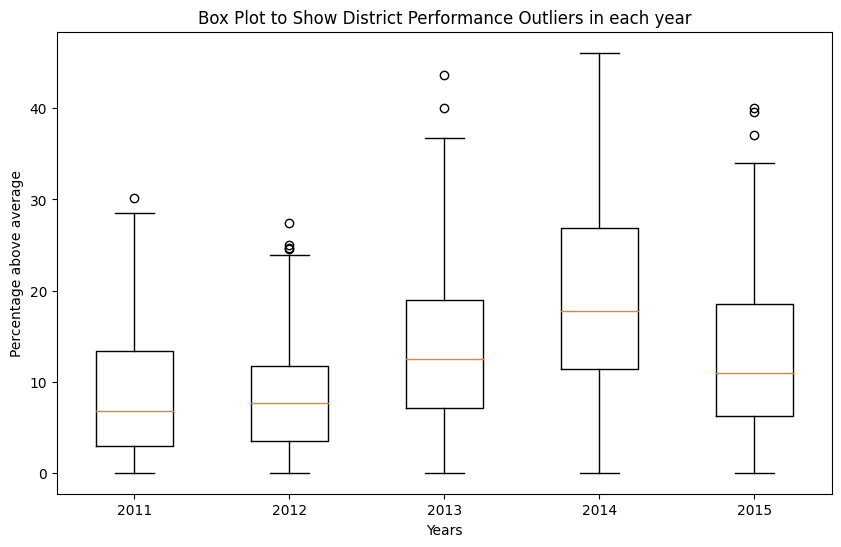

In [212]:
# We would now like to see the district outliers 
# We shall use use the Districts' respective above average values.

districtOutlier_df = pd.DataFrame({
    'Above Average 2011': district_totals['Above Average 2011'],
    'Above Average 2012': district_totals['Above Average 2012'],
    'Above Average 2013': district_totals['Above Average 2013'],
    'Above Average 2014': district_totals['Above Average 2014'],
    'Above Average 2015': district_totals['Above Average 2015']
})

x_years = ['2011', '2012', '2013', '2014', '2015']

plt.figure(figsize=(10, 6))         # make the box plot larger

plt.boxplot(districtOutlier_df, labels=x_years)
plt.title('Box Plot to Show District Performance Outliers in each year')
plt.xlabel('Years')
plt.ylabel('Percentage above average')
plt.show()

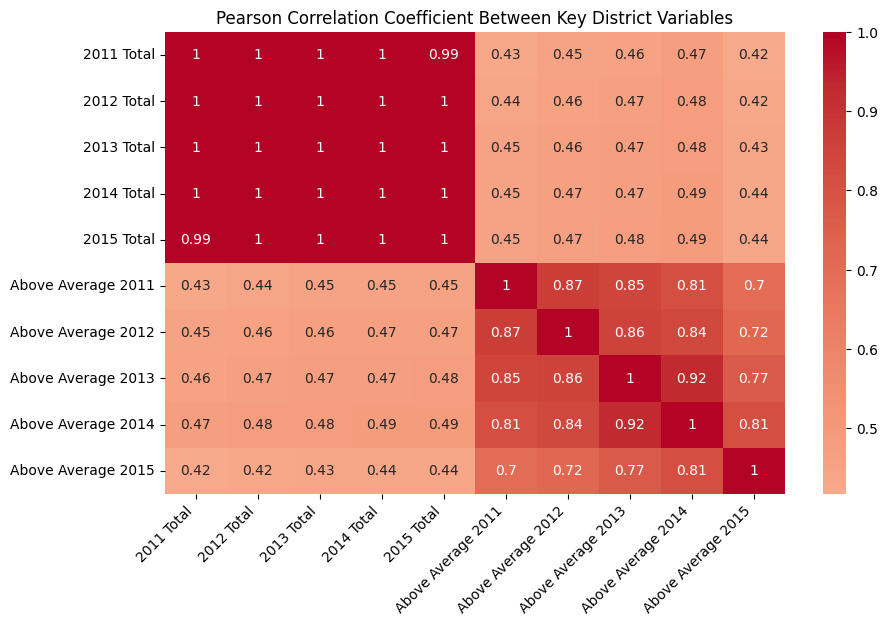

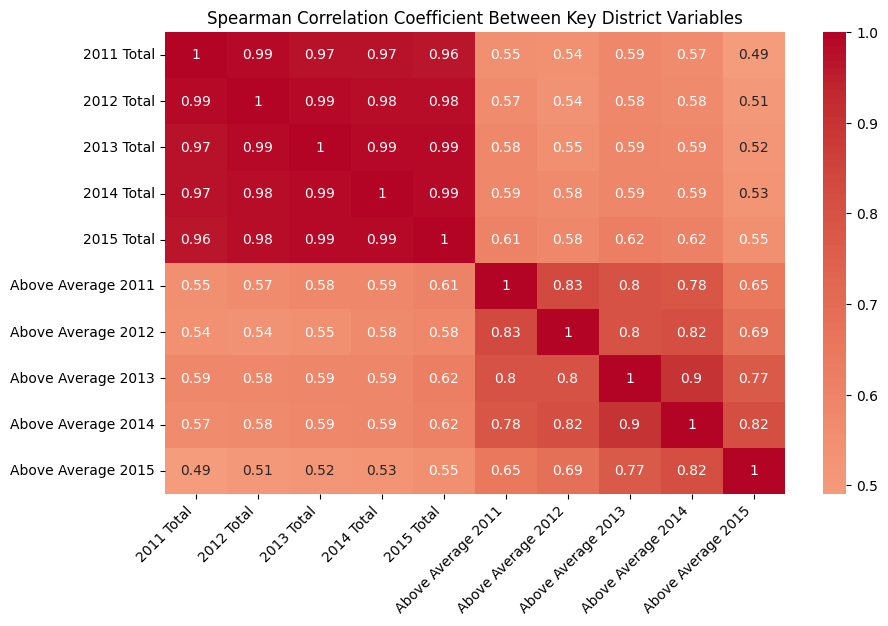

In [220]:
# Finally let's discover how related the various key columns (or variables) regarding districts are
# key columns are annual district totals plus annual performances

key_columns = [
    '2011 Total', '2012 Total', '2013 Total', '2014 Total', '2015 Total', 'Above Average 2011', 'Above Average 2012', 
    'Above Average 2013', 'Above Average 2014', 'Above Average 2015'
]

# We shall use two correlation coefficients ie Pearson and Spearman
pearsonCorr_matrix = district_totals[key_columns].corr()

# Create heatmap to visualize matrix
plt.figure(figsize=(10, 6))         # make the box plot larger
sns.heatmap(pearsonCorr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Coefficient Between Key District Variables')
plt.xticks(rotation=45, ha='right')
plt.show()

spearCorr_matrix = district_totals[key_columns].corr(method='spearman')

# Create heatmap to visualize matrix
plt.figure(figsize=(10, 6))         # make the box plot larger
sns.heatmap(spearCorr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation Coefficient Between Key District Variables')
plt.xticks(rotation=45, ha='right')
plt.show()

In [221]:
# Remove temporary columns from district_totals dataframe
district_totals.drop(
    columns=['Above Average 2011', 
        'Above Average 2012', 
        'Above Average 2013', 
        'Above Average 2014', 
        'Above Average 2015'
    ], inplace=True)

In [222]:
######################## SAYNO ###########################

# First we remember that each school (most schools) occupies two columns ie for FEMALE and MALE
# So let's combine the schools to occupy one single row

# Initialize a new DataFrame to store the combined rows
combinedSchools_df = pd.DataFrame(columns=results_df.columns)

# Initialize variables to store the previous school name and cumulative values
prev_school = ""
cumulative_values = None

# Loop through the rows of the DataFrame
for index, row in results_df.iterrows():
    school_name = row['SCHOOL']
    
    # If the school name is the same as the previous one, accumulate the values
    if school_name == prev_school:
        for year_column in ['2011 Total', '2012 Total', '2013 Total', '2014 Total', '2015 Total']:
            # y - current row year total
            # k - previous row year total
            y = row[year_column]
            k = cumulative_values[year_column]
            studentSum = cumulative_values[year_column] + y
            cumulative_values[year_column] = studentSum
            
            for i in range(1, 5):
                if i > 4 and year_column in ['2013 Total', '2014 Total', '2015 Total']:
                    break
                current_col = results_df.columns.get_loc(year_column) + i
                j = row[current_col]
                x = cumulative_values[current_col]
                
                if studentSum > 0:
                    cumulative_values[current_col] = ((x * y) / studentSum) + ((j * k) / studentSum)
    else:
        # If the school name is different, add the accumulated row to the combined DataFrame
        if cumulative_values is not None:
            combinedSchools_df = combinedSchools_df._append(pd.Series(cumulative_values, index=combinedSchools_df.columns), ignore_index=True)
        
        # Start accumulating values for the new school
        cumulative_values = row.copy()
    
    prev_school = school_name

# Add the last accumulated row to the combined DataFrame
if cumulative_values is not None:
    combinedSchools_df = combinedSchools_df._append(pd.Series(cumulative_values, index=combinedSchools_df.columns), ignore_index=True)


In [223]:
# In addition, let's get rid of the gender column because it's doing us no good at this point in our combinedSchools_df

combinedSchools_df.drop(columns=['Gender'], inplace=True)

# print(combinedSchools_df.columns)
# We now get to the bottom of things and will create additional temporary columns to get 
# percentage of students above average points in each school

combinedSchools_df['Above Average 2011'] = combinedSchools_df['%16-20 Points'] + combinedSchools_df['%21-25 Points']
combinedSchools_df['Above Average 2012'] = combinedSchools_df['%16-20 Points.1'] + combinedSchools_df['%21-25 Points.1']
combinedSchools_df['Above Average 2013'] = combinedSchools_df['%11-15 Points.2'] + combinedSchools_df['%16-20 Points.2']
combinedSchools_df['Above Average 2014'] = combinedSchools_df['%11-15 Points.3'] + combinedSchools_df['%16-20 Points.3']
combinedSchools_df['Above Average 2015'] = combinedSchools_df['%11-15 Points.4'] + combinedSchools_df['%16-20 Points.4']

# Sort the DataFrame based on the combined column
sortedSchools_2011 = combinedSchools_df.sort_values(by='Above Average 2011', ascending=False)
sortedSchools_2012 = combinedSchools_df.sort_values(by='Above Average 2012', ascending=False)
sortedSchools_2013 = combinedSchools_df.sort_values(by='Above Average 2013', ascending=False)
sortedSchools_2014 = combinedSchools_df.sort_values(by='Above Average 2014', ascending=False)
sortedSchools_2015 = combinedSchools_df.sort_values(by='Above Average 2015', ascending=False)

In [224]:
######################## CRONNIE ###########################

# After sorting the schools by each year depending on the school percentage above average
# We can now display the top 20 schools per year

print("Table showing the top 20 schools with the highest percentage of students above average in 2011")
display(sortedSchools_2011[['District_Name', 'SCHOOL', 'Above Average 2011']].head(20))

print("Table showing the top 20 schools with the highest percentage of students above average in 2012")
display(sortedSchools_2012[['District_Name', 'SCHOOL', 'Above Average 2012']].head(20))

print("Table showing the top 20 schools with the highest percentage of students above average in 2013")
display(sortedSchools_2013[['District_Name', 'SCHOOL', 'Above Average 2013']].head(20))

print("Table showing the top 20 schools with the highest percentage of students above average in 2014")
display(sortedSchools_2014[['District_Name', 'SCHOOL', 'Above Average 2014']].head(20))

print("Table showing the top 20 schools with the highest percentage of students above average in 2015")
display(sortedSchools_2015[['District_Name', 'SCHOOL', 'Above Average 2015']].head(20))

Table showing the top 20 schools with the highest percentage of students above average in 2011


,District_Name,SCHOOL,Above Average 2011
410,WAKISO,"ST.MARY'S COLLEGE,KISUBI",95.300000
1422,MBARARA,NTARE SCHOOL,94.600000
415,WAKISO,"ST.MARY'S SECONDARY SCHOOL,KITENDE",92.648795
1532,MUKONO,"MT.ST.MARY'S,NAMAGUNGA",92.600000
1409,MBARARA,MARYHILL HIGH SCHOOL,91.400000
1550,MUKONO,NAMILYANGO COLLEGE,91.100000
248,WAKISO,GAYAZA HIGH SCHOOL,89.400000
414,WAKISO,"ST.MARY'S SECONDARY SCHOOL ANNEX,KITENDE",88.340000
289,WAKISO,"KING'S COLLEGE,BUDO",87.550641
350,WAKISO,"NAALYA SECONDARY SCHOOL,BWEYOGERERE",85.314286


Table showing the top 20 schools with the highest percentage of students above average in 2012


,District_Name,SCHOOL,Above Average 2012
1532,MUKONO,"MT.ST.MARY'S,NAMAGUNGA",92.700000
415,WAKISO,"ST.MARY'S SECONDARY SCHOOL,KITENDE",90.655020
1422,MBARARA,NTARE SCHOOL,88.700000
440,WAKISO,"UGANDA MARTYRS SS,NAMUGONGO",88.140343
350,WAKISO,"NAALYA SECONDARY SCHOOL,BWEYOGERERE",87.637895
289,WAKISO,"KING'S COLLEGE,BUDO",85.155838
410,WAKISO,"ST.MARY'S COLLEGE,KISUBI",83.600000
970,KAMPALA,NABISUNSA GIRLS' SCHOOL,83.400000
1566,MUKONO,SEETA HIGH SCHOOL,81.556494
1357,MASAKA MAIN,"ST.HENRY'S COLLEGE,KITOVU",76.900000


Table showing the top 20 schools with the highest percentage of students above average in 2013


,District_Name,SCHOOL,Above Average 2013
1288,IGANGA,IGANGA SECONDARY SCHOOL,99.585455
289,WAKISO,"KING'S COLLEGE,BUDO",99.560000
1530,MUKONO,MPOMA SCHOOL,99.544578
1566,MUKONO,SEETA HIGH SCHOOL,98.034555
1532,MUKONO,"MT.ST.MARY'S,NAMAGUNGA",97.700000
440,WAKISO,"UGANDA MARTYRS SS,NAMUGONGO",97.076230
415,WAKISO,"ST.MARY'S SECONDARY SCHOOL,KITENDE",96.762097
248,WAKISO,GAYAZA HIGH SCHOOL,96.600000
228,WAKISO,CORNERSTONE LEADERSHIP ACADEMY,96.400000
498,NAKASONGOLA,CORNERSTONE LEADERSHIP ACADEMY,96.000000


Table showing the top 20 schools with the highest percentage of students above average in 2014


,District_Name,SCHOOL,Above Average 2014
410,WAKISO,"ST.MARY'S COLLEGE,KISUBI",100.000000
1288,IGANGA,IGANGA SECONDARY SCHOOL,99.683333
440,WAKISO,"UGANDA MARTYRS SS,NAMUGONGO",98.910332
1532,MUKONO,"MT.ST.MARY'S,NAMAGUNGA",98.800000
415,WAKISO,"ST.MARY'S SECONDARY SCHOOL,KITENDE",98.636585
1568,MUKONO,"SEETA HIGH SCHOOL,MUKONO",98.424590
289,WAKISO,"KING'S COLLEGE,BUDO",98.228986
1369,RUKUNGIRI,IMMACULATE HEART GIRLS SCHOOL,97.500000
350,WAKISO,"NAALYA SECONDARY SCHOOL,BWEYOGERERE",97.239823
248,WAKISO,GAYAZA HIGH SCHOOL,96.000000


Table showing the top 20 schools with the highest percentage of students above average in 2015


,District_Name,SCHOOL,Above Average 2015
1288,IGANGA,IGANGA SECONDARY SCHOOL,99.441060
415,WAKISO,"ST.MARY'S SECONDARY SCHOOL,KITENDE",98.567284
476,KALUNGU,"ST.THEREZA'S GIRLS' SS,BWANDA",97.923077
1068,KABALE,HORNBY HIGH SCHOOL,97.448649
944,KAMPALA,LUZIRA UPPER PRISON HALL,96.666667
776,KOBOKO,NYARILO SECONDARY SCHOOL,93.333333
1532,MUKONO,"MT.ST.MARY'S,NAMAGUNGA",91.700000
1422,MBARARA,NTARE SCHOOL,91.400000
1550,MUKONO,NAMILYANGO COLLEGE,90.900000
371,WAKISO,"PEACE HIGH SCHOOL,MATUGGA",90.000000


In [225]:
# We now get the top 10 perfoming schools across all the years
# Merge all DataFrames heads basing on the 'SCHOOL' column 

merged_df = pd.merge(sortedSchools_2011[['District_Name', 'SCHOOL', 'Above Average 2011']], sortedSchools_2012[['District_Name', 'SCHOOL', 'Above Average 2012']], on='SCHOOL', how='inner')
merged_df = pd.merge(merged_df, sortedSchools_2013[['District_Name', 'SCHOOL', 'Above Average 2013']], on='SCHOOL', how='inner')
merged_df = pd.merge(merged_df, sortedSchools_2014[['SCHOOL', 'Above Average 2014']], on='SCHOOL', how='inner')
merged_df = pd.merge(merged_df, sortedSchools_2015[['SCHOOL', 'Above Average 2015']], on='SCHOOL', how='inner')

merged_df['Above Average Percentage'] = (
    merged_df['Above Average 2011'] + 
    merged_df['Above Average 2012'] + 
    merged_df['Above Average 2013'] + 
    merged_df['Above Average 2014'] + 
    merged_df['Above Average 2015']
) / 5

merged_df = merged_df.sort_values(by='Above Average Percentage', ascending=False)
merged_df = merged_df.drop_duplicates(subset='SCHOOL')
 
print("Best Performing Schools Across All The Years")
display(merged_df[
    [
        'District_Name', 
        'SCHOOL', 
        'Above Average Percentage'
    ]
].head(20))

Best Performing Schools Across All The Years


,District_Name,SCHOOL,Above Average Percentage
2,WAKISO,"ST.MARY'S SECONDARY SCHOOL,KITENDE",95.453956
3,MUKONO,"MT.ST.MARY'S,NAMAGUNGA",94.700000
1,MBARARA,NTARE SCHOOL,91.560000
8,WAKISO,"KING'S COLLEGE,BUDO",91.512824
11,WAKISO,"UGANDA MARTYRS SS,NAMUGONGO",91.204148
9,WAKISO,"NAALYA SECONDARY SCHOOL,BWEYOGERERE",90.724987
0,WAKISO,"ST.MARY'S COLLEGE,KISUBI",89.200000
6,WAKISO,GAYAZA HIGH SCHOOL,87.640000
5,MUKONO,NAMILYANGO COLLEGE,87.580000
24,IGANGA,IGANGA SECONDARY SCHOOL,87.215363


In [226]:
######################## OJOK ###########################

# We would now like to show the locations of these schools' districts on a map
# lets get the top 20 schools into their own dataframe
bestSchools_df = merged_df.head(20)

# function to get coordinates for each school
def add_coordinates(district):
    # get the first name of the district coz some names have additionaldetails eg KOTIDO MAIN
    coords = geocoder.osm(district.split()[0] + ', UGANDA')
    return [coords.lat, coords.lng]

# Add coordinates column to keep track of every school's coordinates
bestSchools_df['coordinates'] = bestSchools_df['District_Name'].apply(add_coordinates)

# print(bestDistricts_df[['District_Name', 'coordinates']])
# Create a map centered at a Uganda
uganda_map = folium.Map(location=[1.373333, 32.290275], zoom_start=7)

# indices to loop through the bestDistricts_df
ind = bestSchools_df.index

# we need to add a marker for each location ie district
for i in range(len(ind)):
    folium.Marker(bestSchools_df['coordinates'].iloc[i],
                    popup= bestSchools_df['District_Name'].iloc[i]).add_to(uganda_map)

# Display the map
uganda_map

In [227]:
# We now work on the schools with the worst perfomance ie least percentage of students above average points
# Since we already sorted the school in their best order, we shall just inverse their order

sortedSchools_2011 = sortedSchools_2011.iloc[::-1]
sortedSchools_2012 = sortedSchools_2012.iloc[::-1]
sortedSchools_2013 = sortedSchools_2013.iloc[::-1]
sortedSchools_2014 = sortedSchools_2014.iloc[::-1]
sortedSchools_2015 = sortedSchools_2015.iloc[::-1]

# But we have a problem, there are schools that had no students in each year
# So it would be better to remove them and have cleaner and fairer results
sortedSchools_2011 = sortedSchools_2011[sortedSchools_2011['2011 Total'] > 0.0]
sortedSchools_2012 = sortedSchools_2012[sortedSchools_2012['2012 Total'] > 0.0]
sortedSchools_2013 = sortedSchools_2013[sortedSchools_2013['2013 Total'] > 0.0]
sortedSchools_2014 = sortedSchools_2014[sortedSchools_2014['2014 Total'] > 0.0]
sortedSchools_2015 = sortedSchools_2015[sortedSchools_2015['2015 Total'] > 0.0]

print("Table showing the top 20 Schools with the Least percentage of students above average in 2011")
display(sortedSchools_2011[['District_Name', 'SCHOOL', 'Above Average 2011']].head(20))

print("Table showing the top 20 Schools with the Least percentage of students above average in 2012")
display(sortedSchools_2012[['District_Name', 'SCHOOL', 'Above Average 2012']].head(20))

print("Table showing the top 20 Schools with the Least percentage of students above average in 2013")
display(sortedSchools_2013[['District_Name', 'SCHOOL', 'Above Average 2013']].head(20))

print("Table showing the top 20 Schools with the Least percentage of students above average in 2014")
display(sortedSchools_2014[['District_Name', 'SCHOOL', 'Above Average 2014']].head(20))

print("Table showing the top 20 Schools with the Least percentage of students above average in 2015")
display(sortedSchools_2015[['District_Name', 'SCHOOL', 'Above Average 2015']].head(20))

Table showing the top 20 Schools with the Least percentage of students above average in 2011


,District_Name,SCHOOL,Above Average 2011
919,KAMPALA,KAWAALA HIGH SCHOOL,0.0
922,KAMPALA,KAWEMPE STANDARD SCHOOL,0.0
924,KAMPALA,KIBULI GIRLS HIGH SCHOOL,0.0
913,KAMPALA,KAMPALA STUDENTS'CENTRE,0.0
944,KAMPALA,LUZIRA UPPER PRISON HALL,0.0
950,KAMPALA,MAKINDYE PARENTS SECONDARY SCHOOL,0.0
965,KAMPALA,"MIREMBE COLLEGE SCHOOL,KATWE",0.0
967,KAMPALA,"MOLLY &amp; PAUL HIGH SCHOOL,KIBUYE",0.0
902,KAMPALA,"HERITAGE COLLEGE SCHOOL,KAWEMPE",0.0
849,MANAFWA,MAGALE PARENTS SECONDARY SCHOOL,0.0


Table showing the top 20 Schools with the Least percentage of students above average in 2012


,District_Name,SCHOOL,Above Average 2012
1040,MUBENDE,KALAMBA HILL SECONDARY SCHOOL,0.0
1039,MUBENDE,KAKUNGUBE SECONDARY SCHOOL,0.0
1037,MUBENDE,"COMPREHENSIVE HIGH SCHOOL,MUBENDE",0.0
1035,MUBENDE,BUKUYA SECONDARY SCHOOL,0.0
1024,KAMPALA,"TRINITY HIGH SCHOOL,KANYANYA",0.0
996,KAMPALA,PRINCESS DIANA HIGH SCHOOL,0.0
995,KAMPALA,"PRIDE ACADEMY,KAMPALA",0.0
975,KAMPALA,NAKULABYE HIGH SCHOOL,0.0
967,KAMPALA,"MOLLY &amp; PAUL HIGH SCHOOL,KIBUYE",0.0
879,KAMPALA,"CITY HILL COLLEGE,MUTUNDWE",0.0


Table showing the top 20 Schools with the Least percentage of students above average in 2013


,District_Name,SCHOOL,Above Average 2013
1170,MAYUGE,ST.JOHN'S BUWAAYA SECONDARY SCHOOL,0.0
1167,MAYUGE,MALONGO SECONDARY SCHOOL,0.0
1165,MAYUGE,"KIGANDAALO SS,MAYUGE",0.0
1164,MAYUGE,KALUBA HIGH SCHOOL,0.0
1154,DOKOLO,BATA MODERN SECONDARY SCHOOL,0.0
1173,BUGIRI MAIN,"BASTON COLLEGE,BUGIRI",0.0
1131,KAYUNGA,MUYALLEN HIGH SCHOOL,0.0
1108,BUKWO,"ST.JOSEPH'S SECONDARY SCHOOL,BUKWO",0.0
1098,KABALE,"ST.FRANCIS COLLEGE,KYANAMIRA",0.0
1097,KABALE,"ST.CHARLES LWANGA SECONDARY SCHOOL,MUKO",0.0


Table showing the top 20 Schools with the Least percentage of students above average in 2014


,District_Name,SCHOOL,Above Average 2014
1370,RUKUNGIRI,KAGUNGA SEED SECONDARY SCHOOL,0.0
1372,RUKUNGIRI,KATURIKA SECONDARY SCHOOL,0.0
1376,RUKUNGIRI,NYABITEETE SECONDARY SCHOOL,0.0
1380,RUKUNGIRI,RUKUNGIRI HIGH SCHOOL,0.0
1381,RUKUNGIRI,RWABUKOBA SECONDARY SCHOOL,0.0
747,TORORO,KANGALABA SECONDARY SCHOOL,0.0
1389,MBARARA,BIRERE SECONDARY SCHOOL,0.0
1390,MBARARA,"BOOMA HIGH SCHOOL,MBARARA",0.0
1416,MBARARA,MBARARA HIGH SCHOOL,0.0
1419,MBARARA,MWIZI SECONDARY SCHOOL,0.0


Table showing the top 20 Schools with the Least percentage of students above average in 2015


,District_Name,SCHOOL,Above Average 2015
1955,KIRUHURA,"UNIVERSAL SECONDARY SCHOOL,NYABUSHOZI",0.0
611,KABERAMAIDO,"MIDLAND HIGH SCHOOL,KABERAMAIDO",0.0
610,KABERAMAIDO,KALAKI SECONDARY SCHOOL,0.0
609,KABERAMAIDO,KABERAMAIDO SECONDARY SCHOOL,0.0
607,KABERAMAIDO,ALWA SECONDARY SCHOOL,0.0
1166,MAYUGE,"LUUBU SECONDARY SCHOOL,MAYUGE",0.0
1165,MAYUGE,"KIGANDAALO SS,MAYUGE",0.0
1164,MAYUGE,KALUBA HIGH SCHOOL,0.0
605,BUNDIBUGYO,ST.MARY'S SIMBYA SECONDARY SCHOOL,0.0
604,BUNDIBUGYO,"SEMULIKI HIGH SCHOOL,IZAURA",0.0


In [228]:
######################## CONRAD ###########################

# We now get the least 10 perfoming schools across all the years
# Merge all DataFrames heads basing on the 'SCHOOL' column 
merged_df = pd.merge(sortedSchools_2011[['District_Name', 'SCHOOL', 'Above Average 2011']], sortedSchools_2012[['District_Name', 'SCHOOL', 'Above Average 2012']], on='SCHOOL', how='inner')
merged_df = pd.merge(merged_df, sortedSchools_2013[['District_Name', 'SCHOOL', 'Above Average 2013']], on='SCHOOL', how='inner')
merged_df = pd.merge(merged_df, sortedSchools_2014[['SCHOOL', 'Above Average 2014']], on='SCHOOL', how='inner')
merged_df = pd.merge(merged_df, sortedSchools_2015[['SCHOOL', 'Above Average 2015']], on='SCHOOL', how='inner')

merged_df['Above Average Percentage'] = (
    merged_df['Above Average 2011'] + 
    merged_df['Above Average 2012'] + 
    merged_df['Above Average 2013'] + 
    merged_df['Above Average 2014'] + 
    merged_df['Above Average 2015']
) / 5

merged_df = merged_df.sort_values(by='Above Average Percentage', ascending=True)
merged_df = merged_df.drop_duplicates(subset='SCHOOL')
 
print("Least Performing Schools Across All The Years")
display(merged_df[
    [
        'District_Name', 
        'SCHOOL', 
        'Above Average Percentage'
    ]
].head(20))


Least Performing Schools Across All The Years


,District_Name,SCHOOL,Above Average Percentage
160,SIRONKO,NAKIRUNGU SECONDARY SCHOOL,0.000000
141,SOROTI,"HOMETEK HIGH SCHOOL,SOROTI",0.000000
143,MOYO,MOYO TOWN SECONDARY SCHOOL,0.000000
150,NTOROKO,KARUGUTU SECONDARY SCHOOL,0.000000
155,LIRA,"ROYAL ACADEMY SCHOOL,LIRA",0.000000
159,ZOMBO,"ST.ALOYSIUS COLLEGE,NYAPEA",0.000000
169,KISORO,IRYARUVUMBA HIGH SCHOOL,0.000000
188,KAMULI,"STANDARD CENTRAL COLLEGE,NAMWENDWA",0.000000
222,LUWERO,NALUVULE COLLEGE SCHOOL,0.000000
189,KAMULI,BUGULUMBYA SECONDARY SCHOOL,0.000000


In [229]:
# We would now like to show the locations of these schools' districts on a map
# lets get the last 20 schools into their own dataframe
lastSchools_df = merged_df.head(20)

# function to get coordinates for each school
def add_coordinates(district):
    # get the first name of the district coz some names have additionaldetails eg KOTIDO MAIN
    coords = geocoder.osm(district.split()[0] + ', UGANDA')
    return [coords.lat, coords.lng]

# Add coordinates column to keep track of every school's coordinates
lastSchools_df['coordinates'] = lastSchools_df['District_Name'].apply(add_coordinates)

# print(bestDistricts_df[['District_Name', 'coordinates']])
# Create a map centered at a Uganda
uganda_map = folium.Map(location=[1.373333, 32.290275], zoom_start=7)

# indices to loop through the bestDistricts_df
ind = lastSchools_df.index

# we need to add a marker for each location ie district
for i in range(len(ind)):
    folium.Marker(lastSchools_df['coordinates'].iloc[i],
                    popup= lastSchools_df['District_Name'].iloc[i]).add_to(uganda_map)

# Display the map
uganda_map

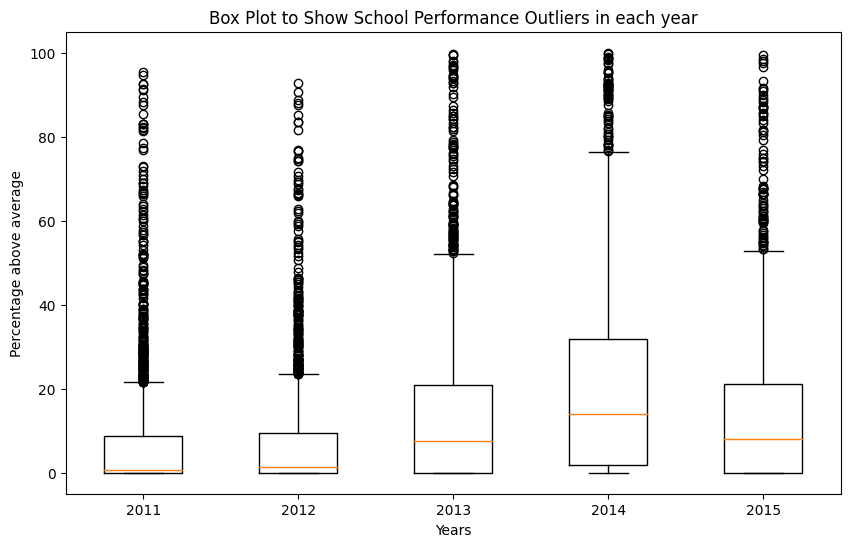

In [230]:
# We would now like to see the school outliers 
# We shall use the schools' respective above average values.

schoolOutlier_df = pd.DataFrame({
    'Above Average 2011': combinedSchools_df['Above Average 2011'],
    'Above Average 2012': combinedSchools_df['Above Average 2012'],
    'Above Average 2013': combinedSchools_df['Above Average 2013'],
    'Above Average 2014': combinedSchools_df['Above Average 2014'],
    'Above Average 2015': combinedSchools_df['Above Average 2015']
})

x_years = ['2011', '2012', '2013', '2014', '2015']

plt.figure(figsize=(10, 6))         # make the box plot larger

plt.boxplot(schoolOutlier_df, labels=x_years)
plt.title('Box Plot to Show School Performance Outliers in each year')
plt.xlabel('Years')
plt.ylabel('Percentage above average')
plt.show()

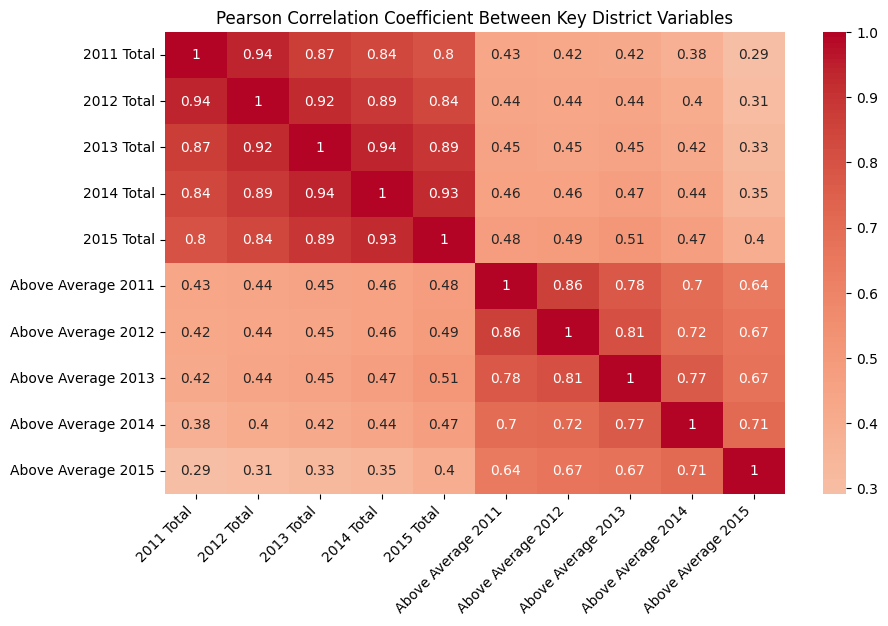

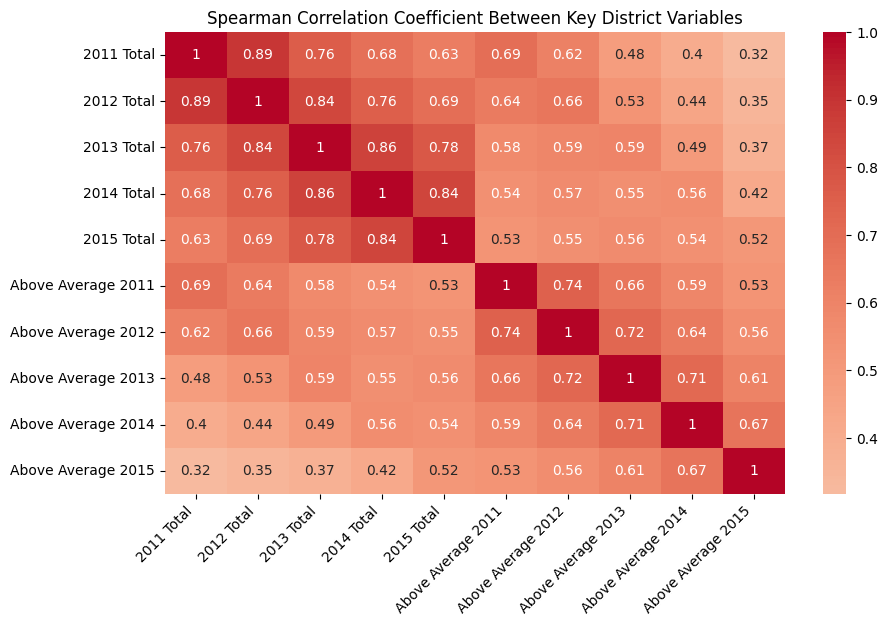

In [231]:
# Let's discover how related the various key columns (or variables) regarding schools are
# key columns are annual school totals plus annual performances

key_columns = [
    '2011 Total', '2012 Total', '2013 Total', '2014 Total', '2015 Total', 'Above Average 2011', 'Above Average 2012', 
    'Above Average 2013', 'Above Average 2014', 'Above Average 2015'
]

# We shall use two correlation coefficients ie Pearson and Spearman
pearsonCorr_matrix = combinedSchools_df[key_columns].corr()

# Create heatmap to visualize matrix
plt.figure(figsize=(10, 6))         # make the box plot larger
sns.heatmap(pearsonCorr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Coefficient Between Key School Variables')
plt.xticks(rotation=45, ha='right')
plt.show()

spearCorr_matrix = combinedSchools_df[key_columns].corr(method='spearman')

# Create heatmap to visualize matrix
plt.figure(figsize=(10, 6))         # make the box plot larger
sns.heatmap(spearCorr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation Coefficient Between Key School Variables')
plt.xticks(rotation=45, ha='right')
plt.show()